# Geopandas cx indexer and performance...

*Sometimes, I have an existential question...*

...like about geographic filtering on a GeoDataFrame!

I want to test the cx indexer performances and to know if it's the best method ? 
The test only uses a simple ** BBOX ** type geometry in order to perform performance tests when using the [Geopandas index cx](http://geopandas.org/indexing.html)...


![amazing](https://media.giphy.com/media/12NUbkX6p4xOO4/giphy.gif "amazing")


## ENVIRONMENT & PACKAGE INSTALLATION

Install theses package with Anaconda: 

```bash
conda create -n cx_indexer_an_existential_question python=3.6
conda activate cx_indexer_an_existential_question
conda install -y pandas=0.25.0 shapely=1.6.4 geopandas=0.5.1 jupyterlab matplotlib 
```

## Prepare input data

We use Geopandas dataset.

In [1]:
import pandas as pd
import geopandas as gpd

input_file = gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(input_file).explode()
world.plot()

## Get a wkt of a square or a rectangle

Get a wkt from your preferred GIS application. Me I'm enjoying to use my own app [sandbox_wkt](https://yruama42.github.io/sandbox_wkt/index.html)... Yeah I'm promoting myself, sorry <:o).
Seriously, let's go now !

In [2]:
from shapely.wkt import loads
europe_polygon = loads("POLYGON ((-5.954447 41.878253, -5.954447 51.241716, 10.658228 51.241716, 10.658228 41.878253, -5.954447 41.878253))")


## Tests

Here are 3 differents methods which are filtering a GeoDataFrame with a polygon (with shapely : what we have done). Of course one of them use the cx indexer :
1. the **apply method** on the geodataframe geometry column with a lambda func using **shapely intersects method**
2. the **pandas loc method** with a filter using **shapely intersects method** *(I love shapely, I confess)*
3. And the best to last... the **cx indexer method** (*with the voice of Arnold Schwarzenegger*)

Here, you can see code and results of each method.

### 1. The apply method:

In [3]:
def filter_data_with_apply_func(data, geom_filter):
    data["is_intersect"] = data["geometry"].apply(lambda geom: geom.intersects(geom_filter))
    data = data.loc[data["is_intersect"] == True]
    data = data.drop(columns=["is_intersect"])
    return data


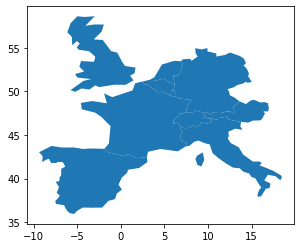

In [4]:
data = filter_data_with_apply_func(world, europe_polygon)
data.plot()

### 2. The pandas loc method

In [5]:
def filter_data_with_loc_func(data, geom_filter):
    data = data.loc[data["geometry"].intersects(geom_filter)]
    return data

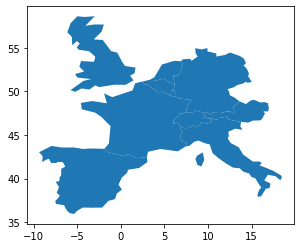

In [6]:
data = filter_data_with_loc_func(world, europe_polygon)
data.plot()

### 3. The cx indexer method


In [7]:
def filter_data_with_cx_index_func(data, geom_filter):
    x_min, y_min, x_max, y_max = geom_filter.bounds
    data = data.cx[x_min:x_max, y_min:y_max]
    return data


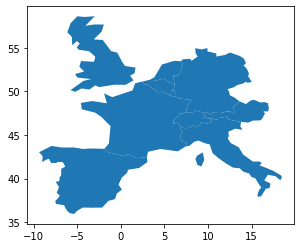

In [8]:
data = filter_data_with_cx_index_func(world, europe_polygon)
data.plot()

## And now... time them !

In [9]:
%timeit filter_data_with_apply_func(world, europe_polygon)

4 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit filter_data_with_loc_func(world, europe_polygon)

2.6 ms ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit filter_data_with_cx_index_func(world, europe_polygon)

17.9 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Oops, we would expect that **the cx indexer is the best method** to filter a GeoDataFrame with a Polygon-bbox like, because it's a geopandas filter method and works only with polygon bounds, but it's not.

 ![oops](https://media.giphy.com/media/jnQYWZ0T4mkhCmkzcn/giphy.gif "oops")


**The loc method** using shapely intersects geometry methods **is the faster way** to do this. **Apply Method** is not bad and  remains an alternative, **an ugly alternative** compared to the loc method... 

Voilà, an existential question resolved until the next update of GeoPandas and to be continued for an another *Sometimes, I have an existential question* episode...